In [1]:
from os import path as osp
import os
from shutil import copy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from heating_planner import colorscale 
from heating_planner.utils import sha

In [3]:
from PIL import Image

In [4]:
df = pd.read_csv("data/screenshots_infos.csv")

In [5]:
for i, data in df.iterrows():
    break

In [22]:
data.final_fname

'screen_2023-08-01_var-T_min--10_max-15_season-Hiver.png'

In [7]:
img = Image.open(osp.join("data/screenshots/", data.final_fname))
im = np.asarray(img)

In [8]:
color_scale = colorscale.extract_colorscale_from_image(img)

In [9]:
value_scale = colorscale.get_value_scale_from_min_max(data.scale_mini, data.scale_maxi, len(color_scale))

In [10]:
colorhash2value = colorscale.get_colorsha2value(color_scale, value_scale)

In [11]:
hashed_map = colorscale.hash1D_color(im)

In [12]:
every_color_hashes = np.array(list(colorhash2value.keys()), dtype=np.int16)
every_values = np.array(list(colorhash2value.values()))
def soft_retrieve_values_from_hashed_colormap(hashedcolor_value: int, factor: float = 10) -> float:
    if hashedcolor_value in colorhash2value:
        return colorhash2value[hashedcolor_value]
    v = factor/np.abs(every_color_hashes - hashedcolor_value)
    return np.sum(np.exp(v)/np.exp(v).sum() * every_values)

soft_retrieve_values_from_hashed_colormap_vec = np.vectorize(soft_retrieve_values_from_hashed_colormap)

In [17]:
def softdict_assignation(hashedcolor_value, every_color_hashes, every_values, factor: float=10.0) -> float:
    """Soft dict from hashed colors to measured values"""
    v = factor/np.abs(every_color_hashes - hashedcolor_value)
    return np.sum(np.exp(v)/np.exp(v).sum() * every_values)

In [21]:
data.to_dict()

{'Unnamed: 0': 0,
 'variable': 'T',
 'season': 'Hiver',
 'scale_mini': -10,
 'scale_maxi': 15,
 'unit': 'degrees C',
 'init_fname': 'Capture d’écran 2023-08-01 à 15.28.20.png',
 'init_folder': '/Users/f.weber/Downloads',
 'final_fname': 'screen_2023-08-01_var-T_min--10_max-15_season-Hiver.png'}

In [13]:
retrieve_values_from_hashed_colormap = lambda c: colorhash2value.get(c, np.nan)
retrieve_values_from_hashed_colormap_vec = np.vectorize(retrieve_values_from_hashed_colormap)

In [15]:
map_of_values = soft_retrieve_values_from_hashed_colormap_vec(hashed_map)

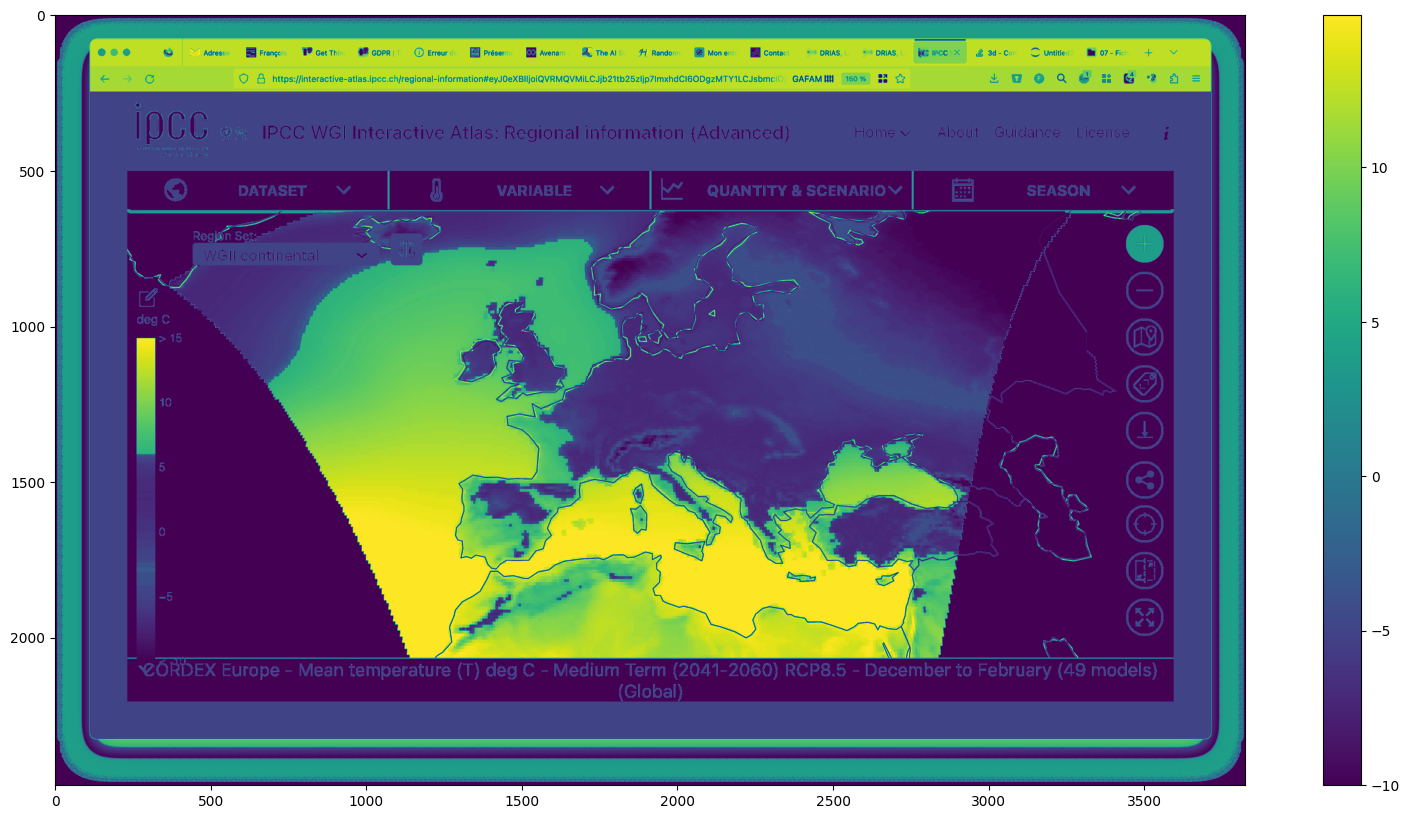

In [16]:
fig = plt.subplots(figsize=(20, 10))
plt.imshow(map_of_values)
plt.colorbar()

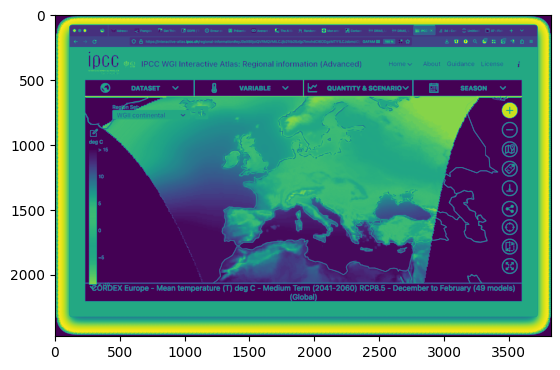

In [26]:
plt.imshow(hashed_map)